# <span style="color:skyblue">12-1 NLP에서의 One-hot Encoding</span>

[단어 집합]  
정의: 서로 다른 단어들의 집합  
> book과 books도 다른 단어!!

## 1. One-hot encoding?
One-hot Encoding: 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 index에 1의 값을 부여하고, 다른 index에는 0을 부여하는 단어의 벡터 표현 방식  

[과정]  
(1) 각 단어에 고유한 index를 부여(정수 인코딩)  
(2) 표현하고 싶은 단어의 index의 위치에 1을 부여하고, 다른 단어의 index의 위치에는 0을 부여  

[예시]  
**문장: 나는 자연어 처리를 배운다**  

In [1]:
from konlpy.tag import Okt

okt = Okt()
token = okt.morphs("나는 자연어 처리를 배운다")
print(token)

['나', '는', '자연어', '처리', '를', '배운다']


In [3]:
# 각 토큰에 대해 고유 index를 부여
word2index = {}

for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)

print(word2index)

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [4]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*len(word2index)
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [5]:
one_hot_encoding('자연어', word2index)

[0, 0, 1, 0, 0, 0]

## 2. One-hot Encoding의 한계

1. 단어의 개수가 늘어날 수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어남  
즉, 벡터의 차원이 계속 늘어남  
2. 단어의 유사도를 표현하지 못함 -> 검색 시스템 등에서 사용할 수 없음...

# <span style="color:skyblue">12-2 Word Embedding</span>

## 1. Sparse Representation
정의: 벡터 또는 행렬의 값이 대부분 0으로 표현되는 방법  
문제점: 단어의 개수가 늘어나면 벡터의 차원이 한없이 커짐 -> 공간적 낭비를 불러옴

In [6]:
import torch

In [7]:
# 원-핫 벡터 생성
dog = torch.FloatTensor([1, 0, 0, 0, 0])
cat = torch.FloatTensor([0, 1, 0, 0, 0])
computer = torch.FloatTensor([0, 0, 1, 0, 0])
netbook = torch.FloatTensor([0, 0, 0, 1, 0])
book = torch.FloatTensor([0, 0, 0, 0, 1])

In [9]:
# 코사인 유사도
print(torch.cosine_similarity(dog, cat, dim=0))
print(torch.cosine_similarity(cat, computer, dim=0))
print(torch.cosine_similarity(computer, netbook, dim=0))
print(torch.cosine_similarity(netbook, book, dim=0))

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


<span style="color:red">Cosine-Similarity를 이용해 One-hot Vector의 유사도를 측정할 수 없음</span>

## 2. Dense Representation
정의: 벡터의 차원을 단어 집합의 크기로 상정하지 않음 -> 사용자가 설정한 값으로 벡터 표현 차원을 맞춤. 또한 0과 1만 가진 값이 아닌 실수값을 가짐  

[예시]  
강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128

## 3. Word Embedding
정의: 단어를 밀집 벡터의 형태로 표현하는 방법  
방법론: LSA, Word2Vec, FastText, Glove

**[One-hot Vector vs Embedding Vector]**  
|-|One-hot Vector|Embedding Vector|
|---|---|---|
|차원|고차원(단어집합의 크기)|저차원|
|다른 표현|희소 벡터의 일종|밀집 벡터의 일종|
|표현 방법|수동|훈련 데이터로부터 학습|
|값의 타입|1과 0|실수|

# <span style="color:skyblue">12-3 Word2Vec</span>

## 1. Sparse Representation
벡터 또는 행렬의 값이 대부분이 0으로 표현되는 희소 표현 방법은 각 단어간 유사성을 표현할 수 없다는 단점이 존재  
이를 위해 대안으로 **분산 표현(distributed representation)** 사용  
또한 분산 표현을 이용해 단어의 유사도를 벡터화하는 작업은 word embedding에 속함  
그리고 이는 저차원을 가지므로 밀집 벡터(dense vector)에도 속함

## 2. Distributed Representation
정의: 분포 가설이라는 가정 하에 만들어진 표현 방법
> **분포 가설: 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가짐**

단어의 의미를 여러 차원에다가 분산하여 표현한 방법으로 정의할 수 있음

## 3. CBOW(Continuous Bag of Words)

Word2Vec에는 CBOW, Skip-Gram 두 가지 방식이 존재  
> CBOW: 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방식  
> Skip-Gram: 중간에 있는 단어로 주변 단어들을 예측하는 방법  

[CBOW]  
예문: "The fat cat sat on the mat"  
["The", "fat", "cat", "on", "the", "mat"]으로부터 sat을 예측하는 것은 CBOW가 하는 일  
"sat" : 중심 단어(center word)
예측에 사용되는 단어들 : 주변 단어(context word)

<p align="center"><img src=https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG></p>
window : 중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지의 범위  
이 후 window를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 dataset을 만들 수 있는데, 이 방법을 sliding-window라고 함  

- CBOW 의 인공신경망
  <p align="center"><img src=https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG></p>
  입력층의 입력으로 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 One-hot Vector가 들어가고, 출력층에서 예측하고자 하는 중간 단어의 One-hot Vector 필요  
  <br>
  하지만 이는 DL Model은 아님 -> hidden layer가 1개만 존재(Shallow Neural Network라 부름)  
  또한 Word2Vec의 hidden layer는 Activation Funcion이 필요하지 않음  
  여기선 hidden layer라기 보단 projection layer라고 부름  
<br></br>
- CBOW의 동작 메커니즘  
  <p align="center"><img src=https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG></p>
  1. projection layer의 크기가 M: 이는 Embedding하고 난 벡터의 차원이 됨
  2. 입력층과 투사층 사이의 가중치 W는 V X M 행렬이며, 투사층에서 출력층사이의 가중지 W'는 M X V 행렬
   여기서 사용되는 W, W'은 굉장히 작은 Random Value로 이루어짐
<br></br>
- 주변 단어의 One-hot Vector와 가중치 W행렬의 곱이 이루어지는 과정  
  <p align="center"><img src=https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG></p>
  위 그림에서 구한 결과 벡터들은 투사층에서 만나 평균인 벡터를 구하게 됨 <- Skip-gram과의 차이점  
  <p align="center"><img src=https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG></p>
  이렇게 구해진 평균 벡터는 W'과 곱해짐  
  이 결과로 One-hot Vector들과 차원이 V로 동일한 벡터가 생성  
  이 벡터에 softmax 함수를 취해 score vector를 구함  
<br></br>
- Score Vector  
  Score Vector의 j번째 index가 가진 0과 1 사이의 값은 j번쨰 단어가 중심 단어일 확률을 나타냄  
  또한 이 값은 중심 단어 One-hot Vector의 값에 가까워져야 함  
  스코어 벡터를 $\hat{y}$라고 하고 중심 단어를 $y$라고 했을 때 두 벡터값의 오차를 줄이기 위해 CBOW는 loss function으로 cross-entropy 함수를 사용  
  <br></br>
  $$H(\hat{y}, y)=-\Sigma^{|V|}_{j=1}y_jlog(\hat{y_j})$$
  <br></br>
  그런데 y가 원-핫 벡터라는 점을 고려하면, 위 식을 다음과 같이 표현할 수 있음  
  <br></br>
  $$H(\hat{y}, y) = - y_i log(\hat{y_i})$$
  <br></br>

## 4. Skip-gram
<p align="center"><img src=https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG></p>

위 그림과 같이 중심 단어에서 주변 단어를 예측  
그림을 보면 이해가 되겠지만 투사층에서 벡터들의 평균을 구하는 과정이 없음  

## 5. Negative Sampling

Word2Vec 모델에는 한 가지 문제점이 존재하는데, 속도의 문제가 있음  
출력층의 softmax 함수는 단어 집합 크기의 벡터 내의 모든 값을 0과 1 사이의 값이면서 모두 더하면 1이 되도록 바꾸는 작업을 함  
그리고 이에 대한 오차를 구해 모든 단어에 대한 embedding을 조정  
Word2Vec은 모든 단어 집합에 대해 softmax 함수를 수행하는데, 이는 주변 단어와 상관없는 모든 단어까지 워드 임베딩 조정 작업을 수행함  
그런데 단어 집합의 크기가 수백만에 달하면 이 작업이 매우 무거워짐  
<br></br>
효율적인 방법으로 주변 단어들과 주변 단어가 아닌 단어 중 일부만 가지고 오고 이진 분류 문제로 변경  
즉, 주변 단어는 positive, 나머지는 negative로 두어 이진 분류 문제를 수행  

# <span style="color:skyblue">12-4 영어/한국어 Word2Vec 학습시키기</span>

## 1. 영어 Word2Vec 만들기
파이썬의 gensim 패키지에는 Word2Vec을 지원하고 있어, gensim 패키지를 이용해 embedding vector로 변환  

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

### 1) 훈련 데이터 이해하기

In [16]:
# 훈련 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x2bfb6660b20>)

여기서 실질적으로 필요한 데이터는 content 사이의 내용  
전처리 작업을 통해 xml 문법들은 제거하고, content 내에서도 배경음을 나타내는 단어들을 제거해줄 예정

### 2) 훈련 데이터 전처리하기

In [18]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\gkwjd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\gkwjd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\gkwjd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\gkwjd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\gkwjd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\gkwjd\AppData\Roaming\nl

True

In [20]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 content 사이의 내용만 가져옴
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 배경음 부분 제거
# 해당 코드는 괄호로 구성된 내용을 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해 NLTK를 이용해 문장 토큰화를 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해 구두점을 제거하고, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해 NLTK를 이용해 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [21]:
print('총 샘플의 개수: {}'.format(len(result)))

총 샘플의 개수: 273380


In [34]:
import pickle

print(len(result))

with open('result.pkl', 'wb') as file:
    pickle.dump(result, file)

273380


In [38]:
with open('result.pkl', 'rb') as f:
    res = pickle.load(f)

print(len(res))



273380


In [39]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


### 3) Word2Vec 훈련시키기

In [42]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

- Word2Vec의 하이퍼파라미터값
  **vector_size** = 워드 벡터의 특징 값. 즉, 입베딩 된 벡터의 차원
  **window** = context 윈도우 크기
  **min_count** = 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않음)
  **workers** = 학습을 위한 프로세스 수
  **sg** = 0 은 CBOW, 1은 Skip-gram

In [43]:
# man과 가장 유사한 단어 확인
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8425540924072266), ('guy', 0.8290044069290161), ('boy', 0.7573254704475403), ('gentleman', 0.7433205842971802), ('lady', 0.7432302236557007), ('girl', 0.7315221428871155), ('poet', 0.719691812992096), ('soldier', 0.7045212984085083), ('kid', 0.7008957266807556), ('friend', 0.6702849864959717)]


### 4) Word2Vec 모델 저장하고 로드하기

In [44]:
model.wv.save_word2vec_format('eng_w2v')
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [45]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8425540924072266), ('guy', 0.8290044069290161), ('boy', 0.7573254704475403), ('gentleman', 0.7433205842971802), ('lady', 0.7432302236557007), ('girl', 0.7315221428871155), ('poet', 0.719691812992096), ('soldier', 0.7045212984085083), ('kid', 0.7008957266807556), ('friend', 0.6702849864959717)]


## 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [47]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x2c02bb551c0>)

In [57]:
train_data = pd.read_table("ratings.txt")

In [58]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [59]:
print(len(train_data))

200000


In [60]:
print(train_data.isnull().values.any())

True


In [61]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [62]:
print(len(train_data))

199992


In [63]:
# 정규 표현식을 이용해 한글이 아닌 경우 제거
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")

C:\Users\gkwjd\AppData\Local\Temp\ipykernel_44868\1818474164.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', "")


In [64]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [66]:
# 불용어 제거, Okt를 사용해 각 문장에 대해 일종의 단어, 형태소 단위로 나누는 토큰화 수행

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 Okt 를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if word not in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [29:56<00:00, 111.30it/s]


리뷰의 최대 길이: 72
리뷰의 평균 길이: 10.716703668146726


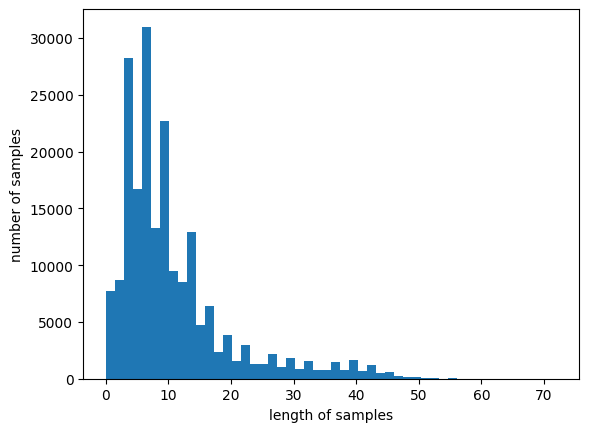

In [67]:
print('리뷰의 최대 길이:', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이:', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [69]:
# Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터 학습

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, workers=4, sg=0)

In [70]:
# Word2Vec 임베딩 행렬 크기 확인
model.wv.vectors.shape

(16477, 100)

총 16477개 단어가 존재하며 각 단어는 100차원으로 구성되어 있음

In [71]:
print(model.wv.most_similar('최민식'))

[('한석규', 0.8708925843238831), ('안성기', 0.8669458031654358), ('최민수', 0.856795072555542), ('크리스찬', 0.8464598655700684), ('박중훈', 0.8404852747917175), ('이민호', 0.8384249806404114), ('윤제문', 0.8287472128868103), ('이정재', 0.8254367709159851), ('주진모', 0.823716402053833), ('단역', 0.8215270638465881)]


In [72]:
print(model.wv.most_similar('히어로'))

[('느와르', 0.8695659041404724), ('호러', 0.8642255663871765), ('무협', 0.857586681842804), ('슬래셔', 0.840457022190094), ('물의', 0.8300780057907104), ('무비', 0.8212965130805969), ('물', 0.8118458986282349), ('정통', 0.8094437718391418), ('블랙', 0.8049955368041992), ('멜로', 0.7853151559829712)]


## 3. 사전 훈련된 Word2Vec 임베딩 소개

In [74]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)


HTTPError: HTTP Error 404: Not Found

404 Error가 발생하는 것으로 보아 사라졌거나 수정된 것으로 보임

# <span style="color:skyblue">12-Embedding Visualization</span>
  
논문: https://arxiv.org/pdf/1611.05469v1.pdf

## 1. 워드 임베딩 모델로부터 2개의 tsv 파일 생성하기

편의를 위해 이전 챕터에서 학습하고 저장했던 Word2Vec 모델인 'eng_w2v'를 재사용  

```terminal
!python -m gensim.scripts.word2vec2tensor --input 모델이름 --output 모델이름
```

In [75]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2024-01-24 18:11:01,466 - word2vec2tensor - INFO - running c:\Users\gkwjd\anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input eng_w2v --output eng_w2v
2024-01-24 18:11:01,466 - keyedvectors - INFO - loading projection weights from eng_w2v
2024-01-24 18:11:02,828 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (21613, 100) matrix of type float32 from eng_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-01-24T18:11:02.807638', 'gensim': '4.1.2', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'load_word2vec_format'}
2024-01-24 18:11:04,862 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2024-01-24 18:11:04,863 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2024-01-24 18:11:04,864 - word2vec2tensor - INFO - finished running word2vec2tensor.py


다음과 같은 파일이 생성되면 성공
<p align="center"><img src=https://wikidocs.net/images/page/50704/eng_w2v.PNG></p>

## 2. 임베딩 프로젝터를 사용해 시각화 하기

링크 : https://projector.tensorflow.org/
  


# <span style="color:skyblue">12-6 스탠프드 대학교의 Glove</span>

## 1. 기존 방법론에 대한 비판

- LSA  
  각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소하여 잠재된 의미를 끌어내는 방법론  

  장점: 카운틑 기반으로 코퍼스의 전체적인 통계 정보를 고려  
  단점: 유추 작업에서 성능이 떨어짐

- Word2Vec
  실제값과 예측값에 대한 오차를 Loss Function을 통해 줄여나가며 학습하는 예측 기반의 방법론  

  장점: 단어 간 유추 작업에는 LSA보다 뛰어남
  단점: 윈도우 크기 내에서만 주변 단어를 고려하므로 코퍼스 전체적인 통계 정보를 반영하지 못함

- Glove  
  위 한계들을 보완하기 위해 카운트 기반 방법과 예측 기반 방법론 두 가지 모두 사용


## 2. 윈도우 기반 동시 등장 행렬

단어의 동시 등장 행렬: 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬  
  
[예제]  
> I like deep learning  
> I like NLP  
> I enjoy flying  

윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고  
<br></br>
윈도우 크기가 1일 때 동시 등장 행렬은 다음과 같음  

|카운트|I|like|enjoy|deep|learing|NLP|flying|
|---|---|---|---|---|---|---|---|
|I|0|2|1|0|0|0|0|
|like|2|0|0|1|0|1|0|
|enjoy|1|0|0|0|0|0|1|
|deep|0|1|0|0|1|0|0|
|learning|0|0|0|1|0|0|0|
|NLP|0|1|0|0|0|0|0|
|flying|0|0|1|0|0|0|0|


위 행렬은 Transpose해도 동일한 행렬이 됨  

## 3. 동시 등장 확률

- 동시 등장 확률  
  $P(k|i)$  
  i는 중심 단어(Center Word), k는 주변 단어(Context Word)  
  
  동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률  

  동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모  
  i행 k열의 값을 분자로 한 값  

  [예시 - 동시 등장 확률과 크기 관계 비]

  ||k=solid|k=gas|k=water|k=fashion|
  |---|---|---|---|---|
  |P(k l ice)|0.00019 | 0.000066 | 0.003 | 0.000017 |
  |P(k l steam) | 0.000022 | 0.00078 | 0.0022 | 0.000018 |
  |P(k l ice) / P(k l steam) | 8.9 | 0.085 | 1.36 | 0.96 |

  위 표를 통해 할 수 있는 사실은 ice가 등장했을 때 solid가 등장할 확률 0.0019는. steam이 등장했을 때 solid가 등장할 확률인 0.000022 보다 약 8.9배 크다

## 4. Loss Function

- 용어 정리  
  - $X$: 동시 등장 행렬(Co-occurrence Matrix)  
  - $X_{ij}$: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수  
  - $X_i$: $\Sigma_jX_{ij}$: 동시 등장 행렬에서 i행의 값을 모두 더한 값  
  - $P_{ik}$: $P(k|i)$=$\frac{X_{ik}}{X_i}$: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률  
  - $\frac{p_{ik}}{p_{jk}}$  
  - $w_i$: 중심 단어 i의 임베딩 벡터  
  - $\hat{w_k}$: 주변 단어 k의 임베딩 벡터  

- GloVe의 아이디어  
  임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것  
  즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표  
  $$dot product(w_i, \hat{w_k})\approx P(k|i)=P_{ik}$$  
  더 정확하게는  
  $$dot product(w_i, \hat{w_k})\approx P(k|i)=log P(k|i) = log P_{ik}$$  

- Loss Function 설계
  $$F(w_i, w_j, \hat{w_k})=\frac{P_{ik}}{P_{jk}}$$    
  위 식에서 시작이 되며 F가 어떤 식인지는 아직 정해지지 않음  

  함수 F는 두 단어 사이의 동시 등장 확률의 크기 관계 비 정보를 벡터 공간에 인코딩하는 것이 목적  
  이를 위해 $w_i$와 $w_j$라는 두 벡터 차이를 함수 F의 입력으로 사용하는 것을 제안  
  $$F(w_i-w_j, \hat{w_k})=\frac{P_{ik}}{P_{jk}}$$  
    
  그런데 위 식에서 우변은 스칼라값이고, 좌변은 벡터값이므로  
  F의 두 입력에 Dot Product를 수행  
  $$F((w_i-w_j)^T\hat{w_k})=\frac{P_{ik}}{P_{jk}}$$ 

  그런데 여기서 중심 단어 $w$와 주변 단어 $\hat{w}$는 무작위 선택이므로 이 둘의 관계가 자유롭게 교환될 수 있도록 해야함  
  이를 위해 함수 $F$가 실수의 덧셈과 양수의 곱셈에 대해 준동형(Homomorphism)을 만족해야함  
  즉, $F(a+b) = F(a)F(b)$ 를 만족해야함   

  이제 위 준동형식을 GloVe식에 적용할 수 있도록 조금씩 바꿔보자  
  $$F(v_1^Tv_2+v_3^Tv_4)=F(v_1^Tv_2)F(v_3^Tv_4)$$  
  그런데 GloVe 식에서는 두 벡터의 차이를 함수 F의 입력으로 받았는데 GloVe식에 바로 적용을 위해 준동형식을 뺄셈에 대한 준동형식으로 변경하면  
  $$F(v_1^Tv_2-v_3^Tv_4)=\frac{F(v_1^Tv_2)}{v_3^Tv_4}$$  

  이제 이 준동형식을 GloVe에 적용해보자  
  $$F((w_i-w_j)^T\hat{w_k})=\frac{F(w_i^T\hat{w_k})}{F(w_j^T\hat{w_k})}$$  
  $$\frac{P_{ik}}{P_{jk}}=\frac{F(w_i^T\hat{w_k})}{F(w_j^T\hat{w_k})}$$
  $$F(w_i^T\hat{w_k})=P_{ik}=\frac{X_{ik}}{X_i}$$  

  이제 이를 만족하는 함수 F를 찾아야 하는데 이를 정확히 만족시키는 함수가 지수 함수  
  따라서 F를 지수함수 exp라고 해보자  
  $$exp(w_i^T\hat{w_k}-w_j^T\hat{w_k})=\frac{exp(w_i^T\hat{w_k})}{exp(w_j^T\hat{w_k})}$$
  $$exp(w_i^T\hat{w_k})=P{ik}=\frac{X_{ik}}{X_i}$$  

  위의 두 번째 식으로부터 다음과 같은 식을 얻을 수 있음  
  $$w_i^T\hat{w_k}=log P{ik}=log(\frac{X_{ik}}{X_i})=log X_{ik}-log X_i$$  

  그런데 여기서 $w_i, \hat{w_k}$는 두 값의 위치를 바꿔도 식이 성립해야 하는데 $log X_i$항이 걸림  
  따라서 이를 $w_i$에 대한 편향 $b_i$라는 상수항으로 대체  
  같은 이유로 $\hat{k}$에 대한 편향 $\hat{b_k}$를 추가  
  $$w_i^T\hat{w_k}+b_i+\hat{b_k}=log X_{ik}$$  

  이를 우변의 값과의 차이를 최소화하는 방향으로 좌변의 4개의 항은 학습을 통해 값이 바뀌는 변수가 됨  
  따라서 Loss Function은 다음과 같이 일반화할 수 있음  
  $$Loss\,function=\Sigma^V_{m,n=1}(w_m^T\hat{w_n}+b_m+\hat{b_n}-logX_{mn})^2$$

  또한 여기서 $X_{ik}$값이 0이 될 수 있는데 이에 대한 대안중 하나로 $logX_{ik}$항을 $log(1+X_{ik})$로 변경하는 것  
  하지만 이렇게 하더라도 동시 등장 행렬 $X$는 DTM처럼 희소 행렬일 가능성이 다분함  
  즉, 동시 등장 빈도가 적어서 많은 값이 작은 수치를 가지거나 0일 경우가 있는데 $X_{ik}$가 굉장히 낮은 경우 정보에 도움이 되지 않는다고 판단해 이에 대한 가중치를 고민하였고  
  $X_{ik}$의 값에 영향을 받는 weighting function $f(X_{ik})$를 손실 함수에 도입  

  다음은 GloVe에 도입되는 $f(X_{ik})$그래프이다  
  <p align="center"><img src=https://wikidocs.net/images/page/22885/%EA%B0%80%EC%A4%91%EC%B9%98.PNG></p>  

  $$f(x)=min(1,(x/x_{max})^{3/4})$$  

  최종적으로 Loss Function은 다음과 같다  
  $$Loss\,function=\Sigma^V_{m,n=1}f(X_{mn})(w_m^T\hat{w_n}+b_m+\hat{b_n}-logX_{mn})^2$$

## 5. GloVe 훈련시키기

In [80]:
!pip install glove-python-binary

ERROR: Could not find a version that satisfies the requirement glove-python-binary (from versions: none)
ERROR: No matching distribution found for glove-python-binary


파이썬 버전이 3.6~3.8에서만 된다고 하여 실습은 생략함

# <span style="color:skyblue">12-7 내부 단어를 고려하는 FastText</span>

## 1. 내부 단어(subword)의 학습

FastText에서는 각 단어는 글자 단위 n-gram의 구성으로 취급  
n을 몇으로 결정하는지에 따라 단어들이 얼마나 분리되는지 결정됨  

[예시]  
n = 3, apple => <ap, app, ppl, ple, le>로 분리하고 이들을 벡터로 만들어냄  

또한 여기에 추가적으로 하나를 더 벡터화 하는데, 기존 단어에 <>를 붙인 토큰  

즉, n = 3인 경우  <ap, app, ppl, ple, le>, <apple> 6개의 토큰을 벡터화  

그런데 실제로 사용할 때는 n의 최소값과 최대값으로 범위를 설정할 수 있음  
=> Word2Vec에서 얻을 수 없었던 강점을 가지게 됨  

## 2. 모르는 단어(Out of Vocabulary)에 대한 대응  
FastText의 인공신경망을 학습한 후에는 데이터 셋의 모든 단어의 각 n-gram에 대해 워드 임베딩이 됨  
이렇게 되면 장점은 <span style="background-color:#fff5b1">데이터 셋만 충분하다면 위와 같은 내부 단어(Subword)를 통해 모르는 단어(Out of Vocabulary)에 대해서도 다른 단어와의 유사도를 계산할 수 있음</span>

[예시]  
birthplace란 단어를 학습하지 않은 상태라고 했을 때 다른 단어에서 birth와 place라는 내부 단어가 있었다면, FastText는 birthplace의 벡터를 얻을 수 있음  
이는 모르는 단어에 제대로 대처할 수 없는 Word2Vec과 GloVe와는 다른 점

## 3. 단어 집합 내 빈도 수가 적었던 단어에 대한 대응  
단어가 희귀 단어라도, 그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우라면, Word2Vec과 비교해 비교적 높은 임베딩 벡터값을 얻을 수 있음  


## 4. 실습으로 비교하는 Word2Vec VS FastText

### 1) Word2Vec

In [82]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("eng_w2v")
model.most_similar('electrofishing')

KeyError: "Key 'electrofishing' not present"

### 2) FastText

In [88]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [89]:
model.wv.most_similar('electrofishing')

[('electrolux', 0.855473518371582),
 ('electrolyte', 0.8533106446266174),
 ('electroencephalogram', 0.8485924005508423),
 ('electroshock', 0.8472487330436707),
 ('electro', 0.8454289436340332),
 ('electrochemical', 0.8294127583503723),
 ('electrogram', 0.825486958026886),
 ('electronic', 0.8231189846992493),
 ('electron', 0.8159002065658569),
 ('electrons', 0.8116163611412048)]

# <span style="color:skyblue">12-9 Pytorch의 nn.Embedding()</span>

1. Embedding layer를 만들어 훈련 데이터로부터 처음부터 임베딩 벡터를 학습하는 ㅏㅇ법  
2. pre-trained word embedding들을 가져와 사용하는 방법  

## 1. 임베딩 층은 룩업 테이블이다
---

임베딩 층의 입력으로 사용되기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어 있어야 함  
어떤 단어 -> 단어에 부여된 고유한 정수값 -> 임베딩 층 통과 -> 밀집 벡터  

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됨  

- 정수를 밀집 벡터(임베딩 벡터)로 맵핑  
  특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블  
  그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가짐  
  <p align="center"><img src=https://wikidocs.net/images/page/33793/lookup_table.PNG></p>

- 룩업 테이블 과정을 nn.Embedding()을 사용하지 않고 구현하기

In [92]:
import torch

In [90]:
train_data = "you need to know how to code"

# 중복을 제거한 단어들의 집합인 단어 집합 생성
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'to': 2, 'how': 3, 'you': 4, 'know': 5, 'code': 6, 'need': 7, '<unk>': 0, '<pad>': 1}


In [91]:
# 단어 집합의 크기를 행으로 가지는 임베딩 테이블 구현
# 임베딩 벡터의 차원은 3
embedding_table = torch.FloatTensor([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.2, 0.9, 0.3],
    [0.1, 0.5, 0.7],
    [0.2, 0.1, 0.8],
    [0.4, 0.1, 0.1],
    [0.1, 0.8, 0.9],
    [0.6, 0.1, 0.1]
])

NameError: name 'torch' is not defined